   Predict the onset of diabetes based on Diagnostic Measures
---




## DATA

Source of the data
The dataset is collected from "kaggle datasets download -d uciml/pima-indians-diabetes-database".

### Data Description
The Dataset consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 


## Attributes
##### "Pregnancies"    
Number of times pregnant
##### "Glucose"  
Plasma glucose concentration a 2 hours in an oral glucose tolerance test
##### "BloodPressure" 
Diastolic blood pressure (mm Hg)
##### "SkinThickness"   
Triceps skin fold thickness (mm)
##### "Insulin"       
2-Hour serum insulin (m--> u U/ml)
##### "BMI"          
Body mass index (weight in kg/(height in m)^2)
##### "DiabetesPedigreeFunction"   
Diabetes pedigree function
##### "Age"        
Age (years)
##### "Outcome"     
Class variable (0 or 1)

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report 

import matplotlib.pyplot as plt
# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Data



In [2]:
filename = 'diabetes.csv'
data=pd.read_csv(filename)

# Looking at the data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Getting number of rows and columns in the data

In [4]:
data.shape

(768, 9)

# Getting the whole information about Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Visualize the data
Visualizing the dataset by plotting the histogram

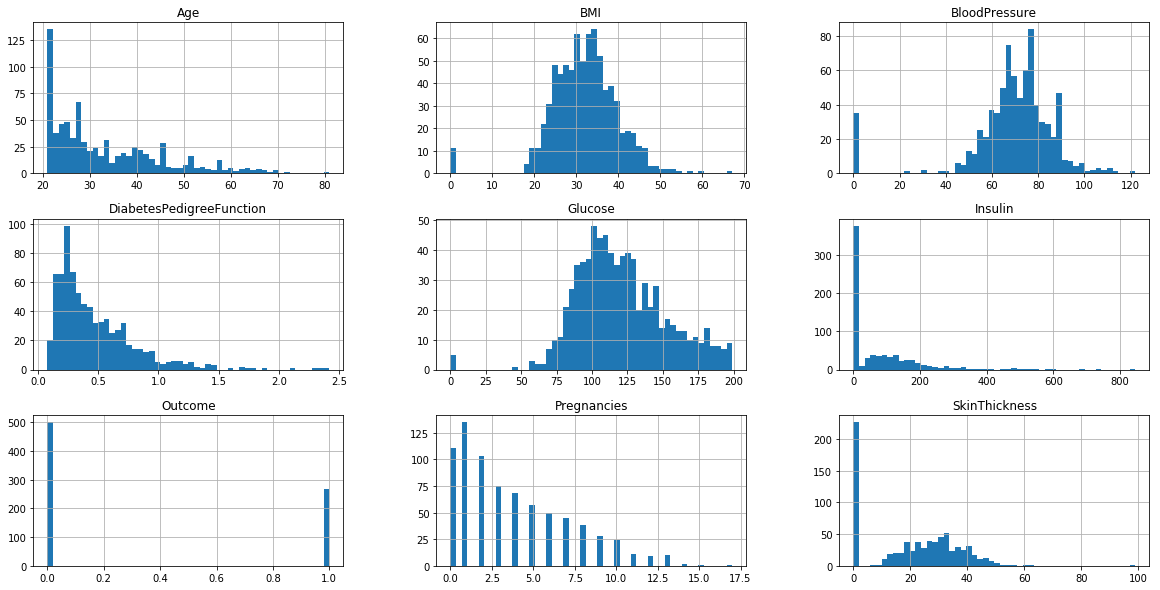

In [6]:
data.hist(bins=50, figsize=(20, 10))
plt.show()

# Preprocessing the dataset
This is a binary classification problem where all of the attributes are numeric and have different scales.

## Getting the correlation matrix 
The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics.



In [7]:
corr = data.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


An important thing I notice in the dataset is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 as BMI or for the blood pressure.

## Data cleaning
 We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data is missing so we have to find a solution to "clean" the data we have.




#### Check NULL Values

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The null rows are absent or replaced with zero by visualization we can see this.
So we replace all the values by median (not by mean because it may contain outleirs also).

Describe the whole summary of data.

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Calculate the median value for BMI
median_bmi = data['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
data['BMI'] = data['BMI'].replace(
    to_replace=0, value=median_bmi)

In [11]:
# Calculate the median value for BloodPressure
median_bloodp = data['BloodPressure'].median()
# Substitute it in the BloodPressure column of the
# dataset where values are 0
data['BloodPressure'] = data['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

In [12]:
# Calculate the median value for Glucose
median_plglcconc = data['Glucose'].median()
# Substitute it in the Glucose column of the
# dataset where values are 0
data['Glucose'] = data['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

In [13]:
# Calculate the median value for SkinThick
median_skinthick = data['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
data['SkinThickness'] = data['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

In [14]:
# Calculate the median value for Insulin
median_twohourserins = data['Insulin'].median()
# Substitute it in the Insulin column of the
# dataset where values are 0
data['Insulin'] = data['Insulin'].replace(
    to_replace=0, value=median_twohourserins)

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Finding Outliers 
After applying the mean and median  on the zero values in the given  dataset we have observed that the mean and median of the whole is data is not same which  represents that there are outliers in the given data.

In [16]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

#### Z-Score
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

Below code uses Z-score function defined in scipy library to detect the outliers.

In [17]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[ 0.63994726  0.86604475  0.03198993 ...,  0.46849198  1.4259954
   1.36589591]
 [ 0.84488505  1.20506583  0.5283186  ...,  0.36506078  0.19067191
   0.73212021]
 [ 1.23388019  2.01666174  0.69376149 ...,  0.60439732  0.10558415
   1.36589591]
 ..., 
 [ 0.3429808   0.02157407  0.03198993 ...,  0.68519336  0.27575966
   0.73212021]
 [ 0.84488505  0.14279979  1.02464727 ...,  0.37110101  1.17073215
   1.36589591]
 [ 0.84488505  0.94206766  0.19743282 ...,  0.47378505  0.87137393
   0.73212021]]


Now the below code define a threshold to identify outliers from the above output.

In [18]:
threshold = 3
a = np.where(z > threshold)
print (a)

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286,
       298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445, 453,
       455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666, 673,
       684, 691, 695, 753], dtype=int64), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4, 4,
       6, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3, 4, 6,
       2, 6, 4, 4, 7, 5, 7, 2, 4, 4], dtype=int64))


The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

### Removing Outliers

Now, below code uses the outliers that were found above and replaces them with the Median value of their respective columns

In [19]:
column_names = list(data.columns.values)
for i in range(0,a[0].size):
    row=a[0][i]
    col=a[1][i]
    colname = column_names[col]
    median = data[colname].median()
    currValue = data.loc[row,colname]
    data[colname] = data[colname].replace(
    to_replace=currValue,value=median)

## Splitting the Dataset
Here we are splitting the dataset into training and test sets

In [20]:
from sklearn import tree
from sklearn.model_selection import train_test_split

#seperate outcome and other features as labels and features
features = data[data.columns[:8]]  
labels = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.3,
    random_state=62,
)

### Precision 
It is true positive values divided by true positives and false positives  

### Recall 
It is true positive values divided by true positives and false negatives it represents completeness whether we have completed all the classes or not 

### F measure
The F1 score (also F-score or F-measure) is a measure of a test's accuracy. The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

# Classification Algorithms

## Decision tree classification 




Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. (repetitively because there may be two distant regions of same class divided by other).
** Decision tree builds classification or regression models in the form of a tree structure.** It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.
Dividing efficiently based on maximum information gain is key to decision tree classifier. However, in real world with millions of data dividing into pure class in practically not feasible (it may take longer training time) and so we stop at points in nodes of tree when fulfilled with certain parameters (for example impurity percentage).

Here we are applying the decision tree classification  using the **sklearn** library

In [21]:
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('accuracy_score: \n',clf.score(X=X_test,y=y_test))

Confusion matrix: 
 [[103  39]
 [ 46  43]]
Classification report: 
              precision    recall  f1-score   support

          0       0.69      0.73      0.71       142
          1       0.52      0.48      0.50        89

avg / total       0.63      0.63      0.63       231

accuracy_score: 
 0.632034632035


## KNN classification algorithm

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 4)
knn = KNeighborsClassifier(n_neighbors=4)

# fitting the model
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('accuracy_score: \n',knn.score(X=X_test,y=y_test))

Confusion matrix: 
 [[123  19]
 [ 51  38]]
Classification report: 
              precision    recall  f1-score   support

          0       0.71      0.87      0.78       142
          1       0.67      0.43      0.52        89

avg / total       0.69      0.70      0.68       231

accuracy_score: 
 0.69696969697


Here weare using the class labels of the nearest neighbours  to predict the unknown class label.

First we **find the euclidean distance** between two points to find the distance between the two points


Then  determine the class from the nearest neighbours list  by taking the majority vote of the class from the k nearest neighbours  and weight the vote according to the distance.

**weight factor, w = 1/d2 **

The problem arrives in KNN if value of k is not choosen appropriately.
If the k is too large ( approximately equal to the size of the dataset) then it will give the constant output, if it is too small then the output is sensitive to noise points

Here  we are taking  the value of k=4 and the obtained more accuracy score  if we increase the value of k to 5 then  accuracy reduces and on decreasing the value of k the accuracy is also decreasing. So the approriate value of k is 4

##SVM clasification algorithm

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side

**Learning the Maximum Margin Classifier**

Given a guess for w and b
Compute whether all data points in correct half-planes

  * Compute the width of the margin
  * Search the space of w’s and b’s to find the widest margin that matches all data points

Correctly classify all training data

     wx(i) + 1 >= 1 ; if y(i) = +1
     wx(i) + 1 <= 1 ; if y(i) = -1
     y(i)(wx(i) +b) >=1

     Maximize : M = 2 / mod(w)  --> Mininmize : 1/2 (w^T * w)

**Solving the Optimization Problem**

Find w and b such that,

Φ(w) = ½ (w^T *w) is minimized;

and for all {(xi,yi)} :  yi(w^T*x(i)+ b) ≥ 1

Need to optimize a quadratic function subject to linear constraints.
Quadratic optimization problems are a well-known class of mathematical programming problems.
The solution involves constructing a dual problem where a Lagrange multiplier is associated with every constraint in the primary problem.


In [23]:
from sklearn import svm
svmclf = svm.SVC(kernel="linear")
svmclf.fit(X=X_train, y=y_train)

y_pred = svmclf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('accuracy_score: \n',svmclf.score(X=X_test,y=y_test))


Confusion matrix: 
 [[127  15]
 [ 43  46]]
Classification report: 
              precision    recall  f1-score   support

          0       0.75      0.89      0.81       142
          1       0.75      0.52      0.61        89

avg / total       0.75      0.75      0.74       231

accuracy_score: 
 0.748917748918


## Naive Bayes  Classification 

It is a probablistic framework for solving the classification problems.It uses the bayes theorem for classification.
This method assumes independence among the attributes when the class is given.
In the given data all the attributes are numerical  so we can use either discretization or  probablity density estimation  method.

The main issue with the naive bayes is for the  outcome when the conditional probablity value is zero. If that happenthen naive bayes will not be able to classify the correct output.(because when we multiply the conditional probablities to find the y value then if one value will be zero then it will affect the whole output ).

###SOLUTION

Because of the given limitations of naive bayes , we have applied the gaussian naive bayes  in our algorithm :
### Gaussian naive bayes

Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution. To estimate the distribution of the data, Gaussian (or Normal distribution) is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data.

**Representation for Gaussian Naive Bayes**

Above, we calculated the probabilities for input values for each class using a frequency. With real-valued inputs, we can calculate the mean and standard deviation of input values (x) for each class to summarize the distribution.

**Learn a Gaussian Naive Bayes Model From Data**

This is as simple as calculating the mean and standard deviation values of each input variable (x) for each class value.

mean(x) = 1/n * sum(x)

Where n is the number of instances and x are the values for an input variable in your training data.

We can calculate the standard deviation using the following equation:

standard deviation(x) = sqrt(1/n * sum(xi-mean(x)^2 ))

This is the square root of the average squared difference of each value of x from the mean value of x, where n is the number of instances.

**Make Predictions With a Gaussian Naive Bayes Model**

Probabilities of new x values are calculated using the Gaussian Probability Density Function (PDF).

When making predictions these parameters can be plugged into the Gaussian PDF with a new input for the variable, and in return the Gaussian PDF will provide an estimate of the probability of that new input value for that class.

pdf(x, mean, sd) = (1 / (sqrt(2 * PI) * sd)) * exp(-((x-mean^2)/(2*sd^2)))

Where pdf(x) is the Gaussian PDF, sqrt() is the square root, mean and sd are the mean and standard deviation calculated above, PI is the numerical constant, exp() is the numerical constant e or Euler’s number raised to power and x is the input value for the input variable.

We can then plug in the probabilities into the equation above to make predictions with real-valued inputs.

In [24]:
#Naive Bayes Classifier
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf.fit(X=X_train, y=y_train)
y_pred = nbclf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('accuracy_score: \n',nbclf.score(X=X_test,y=y_test))

Confusion matrix: 
 [[115  27]
 [ 39  50]]
Classification report: 
              precision    recall  f1-score   support

          0       0.75      0.81      0.78       142
          1       0.65      0.56      0.60        89

avg / total       0.71      0.71      0.71       231

accuracy_score: 
 0.714285714286


## Random Forest classifier

Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It can be used for both classification and regression tasks. 
** Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. **
Random Forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.
Therefore, in Random Forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. You can even make trees more random, by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('accuracy_score: \n',rf.score(X=X_test,y=y_test))


Confusion matrix: 
 [[119  23]
 [ 46  43]]
Classification report: 
              precision    recall  f1-score   support

          0       0.72      0.84      0.78       142
          1       0.65      0.48      0.55        89

avg / total       0.69      0.70      0.69       231

accuracy_score: 
 0.701298701299


# Cross Validation
By using cross validation, we will be splitting our dataset into 10 equal parts...We keep one part for testing our algorithm and we train models on the rest...Now these parts that we divided the dataset into, keeps interchanging to form diffrent combinations of training and testing data...We get difffrent accuracy score for each combination...This is done by cross_val_score()..It gives us the list of diffrent accuracies...Now by taking the mean of this score, we can find the general accuracy of our model... This gives a generalised output..


In [26]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=10)

In [27]:
algos = ["Support Vector Machine","K Nearest Neighbor","Naive Bayes","Random Forest Classifier","Decision tree classifier"]
clfs = [svm.SVC(kernel="linear"),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB(),RandomForestClassifier(random_state = 4),tree.DecisionTreeClassifier()]
cv_results=[]
for classifiers in clfs:
    cv_score = cross_val_score(classifiers,features,labels,cv=kfold,scoring="accuracy")
    cv_results.append(cv_score.mean())
cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
Support Vector Machine,0.773411
Naive Bayes,0.750017
Random Forest Classifier,0.744771
K Nearest Neighbor,0.714833
Decision tree classifier,0.691388
